## 引入依赖库

In [1]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import pandas as pd
import warnings
#忽略警告
warnings.filterwarnings('ignore')

## 加载并查看数据集

In [14]:
dataset= datasets.load_breast_cancer()
X = dataset.data
Y = dataset.target
#加载数据集
data_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data_df['result'] = dataset.target
data_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [17]:
#数据归一化
X=MinMaxScaler().fit_transform(X)
data_df = pd.DataFrame(X, columns=dataset.feature_names)

data_df.head(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
5,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,0.551179,...,0.268232,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939
6,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,0.157119,...,0.531839,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853
7,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447,0.297465,0.573737,0.517060,...,0.324795,0.429638,0.299766,0.174941,0.622268,0.330753,0.213898,0.534708,0.321506,0.393939
8,0.284869,0.409537,0.302052,0.159618,0.674099,0.533157,0.435567,0.464861,0.651515,0.504002,...,0.268943,0.498667,0.277852,0.136183,0.654626,0.497531,0.430511,0.707904,0.554504,0.342123
9,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,0.683867,...,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000


## 数据分割

In [4]:
# 将数据分割为训练和验证数据，都有特征和预测目标值
# 分割基于随机数生成器。为random_state参数提供一个数值可以保证每次得到相同的分割
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(426, 30) (143, 30) (426,) (143,)


In [5]:
x=torch.tensor(X_train,dtype=torch.float32)
y=torch.tensor(y_train,dtype=torch.float32)
x.size()

torch.Size([426, 30])

## 迭代训练

In [18]:
x=torch.tensor(X_train,dtype=torch.float32)
y=torch.tensor(y_train,dtype=torch.float32)

# 把标签转为2维
y = y.view(y.shape[0],1)

#迭代次数
epochs=500

#学习率
learning_rate=0.5

plt_epoch=[]
plt_loss=[]
  
class SyNet(torch.nn.Module):
    def __init__(self):
        super(SyNet,self).__init__()
        self.fc1 = torch.nn.Linear(30, 10)
        self.fc2 = torch.nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x
model=SyNet()


#损失函数
cost=nn.BCELoss()
#迭代优化器
optmizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
import datetime

starttime = datetime.datetime.now()


for epoch in range(epochs):
    #预测结果
    predictions=model(x) #调用__call__函数

    #计算损失值
    loss=cost(predictions,y)

    #在反向传播前先把梯度清零
    optmizer.zero_grad()

    #反向传播,计算各参数对于损失loss的梯度
    loss.backward()

    #根据刚刚反向传播得到的梯度更新模型参数
    optmizer.step()

    plt_epoch.append(epoch)
    plt_loss.append(loss.item())

    #打印损失值
    if epoch%100==0:
        print('epoch:',epoch,'loss:',loss.item())


endtime = datetime.datetime.now()
print(endtime - starttime)


epoch: 0 loss: 0.8076746463775635
epoch: 100 loss: 0.6606538891792297
epoch: 200 loss: 0.17838254570960999
epoch: 300 loss: 0.03764188289642334
epoch: 400 loss: 0.05110763758420944
0:00:00.413118


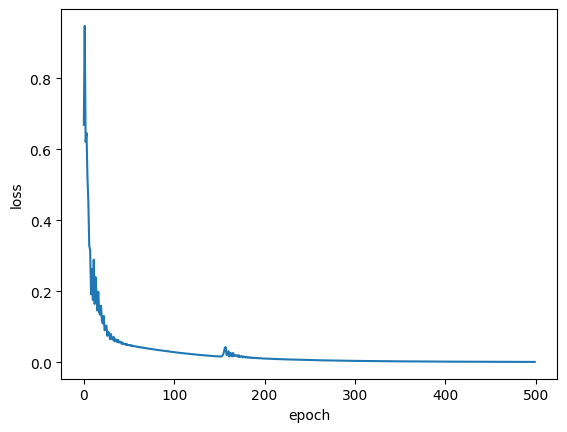

In [10]:
# 绘制迭代次数与损失函数的关系
import matplotlib.pyplot as plt
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(plt_epoch,plt_loss)

## 测试数据集

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
#测试数据
x_t=torch.tensor(X_test,dtype=torch.float32)
y_t=torch.tensor(y_test,dtype=torch.float32)
# 把标签转为2维
y_t = y_t.view(y_t.shape[0],1)
# print(y_t)
#预测结果
predictions=model(x_t)
#计算损失值
loss=cost(predictions,y_t)

print('loss:',loss.detach().item())

a=torch.tensor([1.],dtype=torch.float32)
b=torch.tensor([0.],dtype=torch.float32)
predictions=torch.where(predictions>0.5,a,b)
# print(predictions)
print(f"预测准确率: {(torch.sum(predictions == y_t)/torch.tensor(y_t.size()[0],dtype=torch.float32)) * 100}%")
print("AUC指标：", roc_auc_score(y_t, predictions))

loss: 1.5453015565872192
预测准确率: 95.10489654541016%
AUC指标： 0.9455974842767296
